# Objective 01 - Describe the Foundational Components of a Neural Network
## Overview
Later in this module, we will use a few handy tools to architect and train neural networks. But before we dive into that, we need to understand much more basic concepts of neural networks. As you can see from the name, neural networks use neurons, a digital-analog of a biological neuron. These neurons are linked or networked in a certain way to form a neural network. Essentially, a neural network is a computational model that works similarly to the human (or animal) brain.

Neural networks range from simple single-layer perceptrons to complex ones with many hidden layers composed of many neurons. The complexity of the neural network depends on the dataset and the problem to solve.

### Perceptron
A neuron can be a single unit that accepts input (data) and provides output. The value of the output depends on the activation threshold of the neuron. The neuron will "fire" if the input is above the threshold; otherwise, the output is zero.

The input to this perceptron is the data multiplied by a set of weights. The weights are updated for each iteration or pass through the network. The weighted input is then passed to the activation function. This function maps the input to the output, which depends on the function.

We start with some input data and a set of weights to apply to that data. The one part we haven't mentioned yet is how a neural network learns. On the first iteration, the weights are selected randomly. Then, the weights are adjusted after the calculated results are compared to the expected results (using training data). Finally, these new weights are used to calculate the weighted sum, new results are calculated, and so on for the number of iterations specified.

## Follow Along
Let's implement a simple single-layer perceptron to explain better what we learned in the overview. It will be easier to understand how the different components of a neural network fit together with some example code.

In the following example, we'll describe and implement the following parts of a neural network:

- activation function
- input data
- weights
- learning rate
### Activation function
The activation function maps the input to the output. This example uses a step function where the output is 0 if the sum of the weighted input is less than 0 and 1 otherwise. Again, a visualization of the function will help.

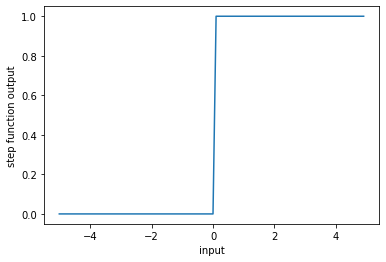

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function
unit_step = lambda x: 0 if x < 0 else 1

# Vectorize the function (use on an array)
unit_step_v = np.vectorize(unit_step)

# Create arrays to plot
x = np.arange(-5, 5, 0.1)
y = unit_step_v(x)

# Plot
plt.plot(x, y)
plt.xlabel('input'); plt.ylabel('step function output');

# plt.clf() # comment/delete to show plot

In [2]:
import random
# Empty set for reusability
randomlist = []
# Loop 5 times generating nums 
for i in range(0,5): # range 0 through 4
	n = random.randint(-10,10)
	randomlist.append(n)
print(randomlist)

[7, -4, 8, 6, -5]


In [21]:

import numpy as np
def myfunc(a):
    "Return a-b if a>b, otherwise return a+b"
    if a > 2:
        return bool(True)
    else: return bool(False)
# vectorize iterates function.
vfunc = np.vectorize(myfunc)
vfunc([1, 2, 3, 4])


array([False, False,  True,  True])

Next, we'll define some data to test, which in this case will be the logical OR operator: for input that includes a 1, the output is 1; otherwise, the output is 0. We'll consider an input array of two values so the possible choices are: [0,0], [0,1], [1,0], [1,1]. There is also a bias term, which is currently set to 1 for all inputs (we can use the bias to adjust the threshold; we will focus on the weights only first). The other part of the training data is the expected output, 0 for [0,0] and 1 for the rest of the inputs.

In [22]:
# Data ('OR' gate)
# tuple format: ([x1, x2, bias], expected)
training_data = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

Now we'll code the perceptron. First, we'll initialize the weights using random numbers between 0 and 1. Then we'll set the learning rate as 0.2 (we'll learn more about the learning rate in the next module). We'll start with a low number of iterations so we can easily look through our output.
# Perceptron code follows the example here, with
# some modifications: 
# https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/


In [25]:
from random import choice   # Imports #for random input selection
w = np.random.rand(3)       # Weights (begin with random weights)
errors = []                 # Errors (store for plotting)
learn_rate = 0.2            # Learning rate (the size of "jumps" when updating the weights)
n = 50                      # Number of iterations/weight updates
for i in range(n):          # "Learning" loop
    x, expected = choice(training_data) # Select a random item from the training data
    result = np.dot(w, x)   # Neuron calculation (dot product of weights and input)
    error = expected - unit_step(result) # Compare to the expected result
    errors.append(error)
    w += learn_rate * error * x # Update the weights
for x, _ in training_data:  # Test the perceptron with the "learned" weights
    result = np.dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.1514812348736393 -> 0
[0 1]: 0.52280979642973 -> 1
[1 0]: 0.8052107186547842 -> 1
[1 1]: 1.4795017499581538 -> 1
